In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
print(X.shape,y.shape)

(150, 4) (150,)


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
y_pred = knn.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


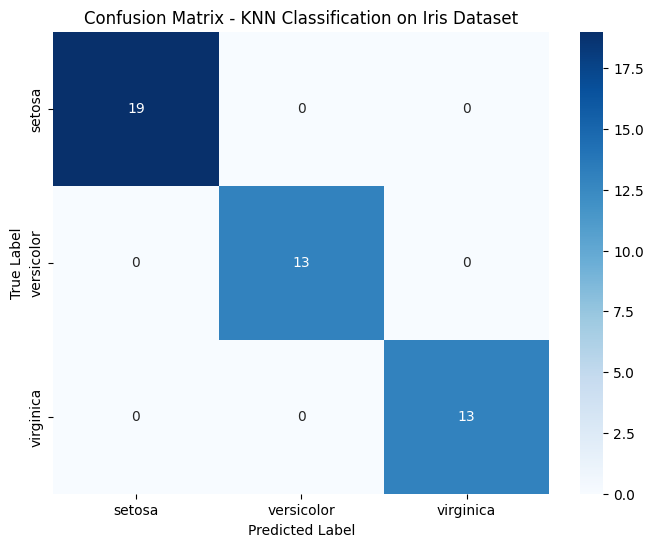

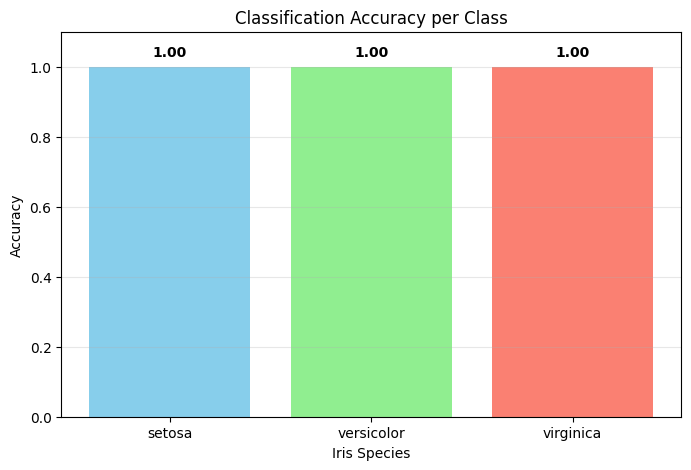

In [9]:
import seaborn as sns
import numpy as np

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - KNN Classification on Iris Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Additional visualization: Classification accuracy per class
class_names = iris.target_names
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

plt.figure(figsize=(8, 5))
bars = plt.bar(class_names, class_accuracy, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Classification Accuracy per Class')
plt.xlabel('Iris Species')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)

# Add accuracy values on top of bars
for i, (bar, acc) in enumerate(zip(bars, class_accuracy)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{acc:.2f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()